In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

dark_mode = True
# plotting choices for dark-mode
if (dark_mode):
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
    linecolor = 'w'
else:
    linecolor = 'k'


# parallel 10x10 data   a    b    c    d    e    f    g    h     i     j
field_map1 = np.array([[1.36,1.52,1.92,2.82,5.08,6.70,8.37,9.89,10.38,10.58],#1
                       [0.98,0.81,0.54,2.70,4.89,6.91,9.42,11.58,11.11,11.0],#2
                       [0.57,0.29,0.00,2.49,4.93,7.30,9.66,12.03,11.70,11.35],#3
                       [0.39,0.16,0.00,2.49,4.98,7.35,9.66,12.03,11.86,11.60],#4
                       [0.29,0.08,0.00,2.46,4.92,7.05,9.70,12.03,11.96,11.67],#5
                       [0.28,0.06,0.00,2.50,4.60,6.87,9.50,12.03,11.94,11.64],#6
                       [0.40,0.14,0.00,2.57,4.58,6.94,9.40,12.03,11.75,11.47],#7
                       [0.64,0.33,0.00,2.62,4.69,6.90,9.45,12.03,11.43,11.16],#8
                       [1.10,1.01,1.22,2.89,5.00,6.88,8.90,10.69,10.68,10.64],#9
                       [1.54,1.76,2.43,3.35,5.14,6.77,8.17,9.30,9.92,10.16]])#10

# point 10x10 data       a   b   c   d   e   f   g   h   i   j
field_map2 = np.array([[3.3,3.7,4.1,4.7,5.5,6.2,7.1,7.6, 8.1, 8.5],#1
                       [3.0,3.4,3.8,4.5,5.5,6.4,7.3,8.0, 8.5, 8.8],#2
                       [2.6,2.9,3.3,4.2,5.4,6.5,7.5,8.5, 9.1, 9.3],#3
                       [2.0,2.0,2.3,3.7,5.3,6.8,8.2,9.5, 9.9, 9.8],#4
                       [1.4,0.5,1.5,3.5,5.4,7.3,9.2,10.5,11.2,10.3],#5
                       [1.4,0.4,1.2,3.4,5.5,7.7,9.4,11.0,11.2,10.4],#6
                       [1.9,2.0,2.7,4.2,5.9,7.6,9.2,9.9, 10.2,10.0],#7
                       [2.6,3.0,3.6,4.7,6.1,7.4,8.6,9.2, 9.6, 9.6],#8
                       [3.2,3.6,4.2,5.2,6.3,7.3,8.2,8.8, 9.2, 9.3],#9
                       [3.6,4.0,4.6,5.5,6.4,7.1,7.9,8.4, 8.9, 9.1]])#10

# mystery 10x10 data     1    2    3    4    5    6    7    8     9     10
field_map3 = np.array([[0.69,2.07,3.21,4.43,5.58,6.66,7.72,8.84,10.03,11.43],#1
                       [0.60,2.04,3.45,4.51,5.67,6.59,7.69,8.86,10.06,11.60],#2
                       [0.57,2.14,3.60,4.92,5.82,6.50,7.43,8.70,9.96,11.64],#3
                       [0.63,2.36,3.94,5.72,6.10,6.11,6.79,8.32,9.92,11.64],#4
                       [0.61,2.52,4.56,6.10,6.10,6.11,6.11,8.07,9.81,11.63],#5
                       [0.64,2.54,4.51,6.10,6.10,6.11,6.11,8.10,9.82,11.54],#6
                       [0.73,2.42,4.17,5.76,6.11,6.12,6.85,8.50,9.88,11.66],#7
                       [0.67,2.32,3.74,5.02,5.88,6.53,7.56,8.72,10.00,11.73],#8
                       [0.62,2.21,3.73,4.80,5.81,6.70,7.74,8.95,10.21,11.69],#9
                       [0.91,2.21,3.51,4.70,5.77,6.77,7.90,9.00,10.11,11.37]])#10

# pretty tedious huh? this is exactly what cameras do everyday.
# show some empathy next time you snap. >:(

# calculate gradient of the V field ( E = - grad V)
gradx1, grady1 = np.gradient(field_map1)
gradx2, grady2 = np.gradient(field_map2)
gradx3, grady3 = np.gradient(field_map3)

gradx1, grady1 = -gradx1, -grady1
gradx2, grady2 = -gradx2, -grady2
gradx3, grady3 = -gradx3, -grady3

e_field1 = np.sqrt(gradx1**2 + grady1**2)
e_field2 = np.sqrt(gradx2**2 + grady2**2)
e_field3 = np.sqrt(gradx3**2 + grady3**2)

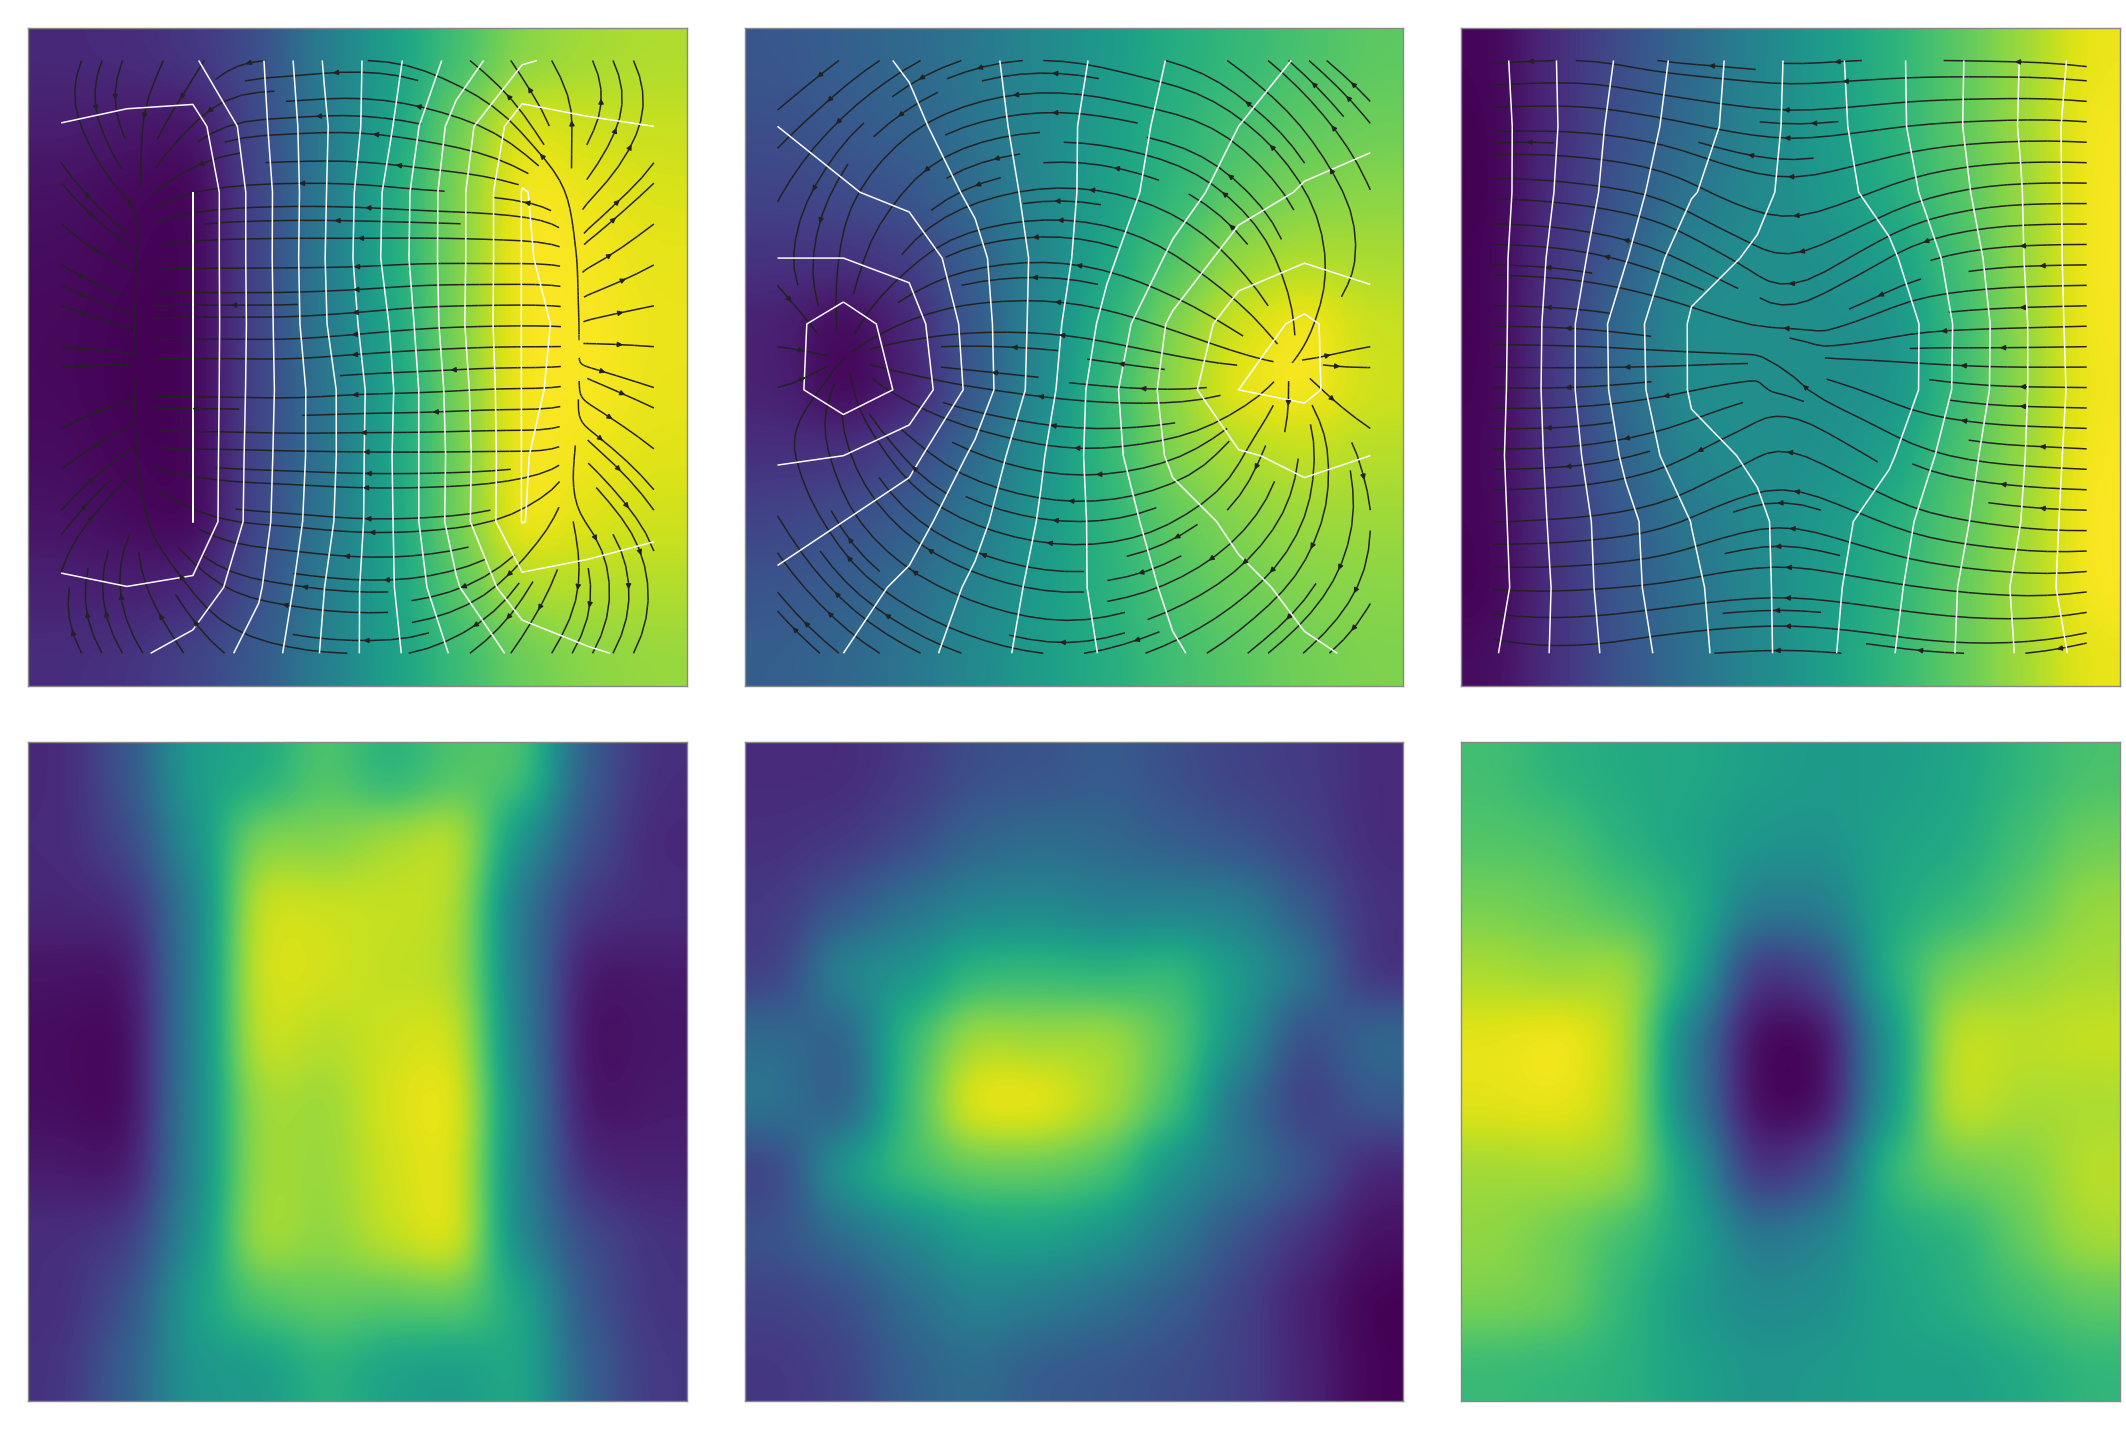

In [2]:

# define figure
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3,figsize=(30, 20))

# interpolation methods: https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html
# color maps: https://matplotlib.org/stable/tutorials/colors/colormaps.html
im1 = ax1.imshow(field_map1, interpolation='gaussian', cmap='viridis')
im2 = ax2.imshow(field_map2, interpolation='gaussian', cmap='viridis')
im3 = ax3.imshow(field_map3, interpolation='gaussian', cmap='viridis')
im4 = ax4.imshow(e_field1, interpolation='gaussian', cmap='viridis')
im5 = ax5.imshow(e_field2, interpolation='gaussian', cmap='viridis')
im6 = ax6.imshow(e_field3, interpolation='gaussian', cmap='viridis')

# show the E field lines
''' # Vector field visualization 
ax1.quiver(grady1, -gradx1)
ax2.quiver(grady2, -gradx2)
ax3.quiver(grady3, -gradx3)
''' # streamplot visualization
X, Y =np.meshgrid(range(10),range(10))
ax1.streamplot(X,Y,grady1, gradx1, color='k')
ax2.streamplot(X,Y,grady2, gradx2, color='k')
ax3.streamplot(X,Y,grady3, gradx3, color='k')
#'''

# show equipotential lines
ax1.contour(field_map1, 12, colors=['w'])
ax2.contour(field_map2, 12, colors=['w'])
ax3.contour(field_map3, 12, colors=['w'])

#ax4.contour(field_map1, 12, colors=['w'])

# UNCOMMENT TO SHOW THE TRUE VALUE IN EACH CELL
"""
for i in range(10):
    for j in range(10):
        #text1 = ax1.text(j, i, field_map1[i, j], ha="center", va="center", color="w")
        #text1 = ax1.text(j, i, "{:.2f}\n({},{})".format(field_map1[i,j],i,j), ha="center", va="center", color="k")
        #text2 = ax2.text(j, i, field_map2[i, j], ha="center", va="center", color="w")
        #text3 = ax3.text(j, i, field_map3[i, j], ha="center", va="center", color="w")
        #text4 = ax4.text(j, i, "{:.3f}\n({},{})".format(e_field1[i,j],i,j), ha="center", va="center", color="k")
        #text5 = ax5.text(j, i, "({},{})".format(i,j), ha="center", va="center", color="k")
        #text6 = ax6.text(j, i, "({},{})".format(i,j), ha="center", va="center", color="k")
"""

# formatting stuff

ax1.set_title('parallel',fontsize=20)
ax1.tick_params(colors='w')
ax1.title.set_color('w')

ax2.set_title('point',fontsize=20)
ax2.tick_params(colors='w')
ax2.title.set_color('w')

ax3.set_title('mystery',fontsize=20)
ax3.tick_params(colors='w')
ax3.title.set_color('w')

ax4.set_title('parallel |E| constant between plates',fontsize=20)
ax4.tick_params(colors='w')
ax4.title.set_color('w')

ax5.set_title('point |E| ',fontsize=20)
ax5.tick_params(colors='w')
ax5.title.set_color('w')

ax6.set_title('mystery |E|',fontsize=20)
ax6.tick_params(colors='w')
ax6.title.set_color('w')

""" gridline code; uncomment later
ax1.set_xticks(np.arange(0, 10, 1))
ax1.set_yticks(np.arange(0, 10, 1))
ax1.set_xticks(np.arange(-.5, 10, 1), minor=True)
ax1.set_yticks(np.arange(-.5, 10, 1), minor=True)
ax1.grid(which='minor',color='w', linestyle='-', linewidth=1)

ax4.set_xticks(np.arange(0, 10, 1))
ax4.set_yticks(np.arange(0, 10, 1))
ax4.set_xticks(np.arange(-.5, 10, 1), minor=True)
ax4.set_yticks(np.arange(-.5, 10, 1), minor=True)
ax4.grid(which='minor',color='w', linestyle='-', linewidth=1)
"""

fig.tight_layout()
plt.show()

## Parallel-Plate Electric Field Analysis

We expect the electric field between the parallel plates to be constant within a margin of error. This means the voltage changes linearly from one plate to the other.

### procedure
1. do some stuff

In [3]:
# indices for analysys
x1, y1 = 2,3 # top left
x2,y2 = 7,6 # bottom right

# get data for analysis
v_field = field_map1[x1:x2+1,y1:y2+1]
e_field = e_field1[x1:x2+1,y1:y2+1]

#print(v_field)
#print(e_field)

# calculate theoretical quantities
V_plates = 12.0
dV_plates = 0.1

d_plates = 6.7*0.01
dd_plates = 0.05*0.01

theory_e = V_plates/d_plates
d_theory_e = theory_e*(dV_plates/V_plates+dd_plates/d_plates)

print("THEORETICAL MEASUREMENT:", theory_e,d_theory_e)



THEORETICAL MEASUREMENT: 179.1044776119403 2.82913789262642


          V    dV      x      dx
0  2.521667  0.02  0.000  0.0005
1  4.783333  0.02  0.015  0.0005
2  7.068333  0.02  0.030  0.0005
3  9.561667  0.02  0.045  0.0005
Beta: [156.11419865   2.4711806 ]
Beta Std Error: [2.59429623 0.07279596]
Beta Covariance: [[ 5.77428698e+00 -1.29921529e-01]
 [-1.29921529e-01  4.54646461e-03]]
Residual Variance: 1.1655764480338608
Inverse Condition #: 0.016661886186132704
Reason(s) for Halting:
  Sum of squares convergence

Final Result: Y = (156.114198649 +/- 2.594296225) X + (2.471180597 +/- 0.072795962)


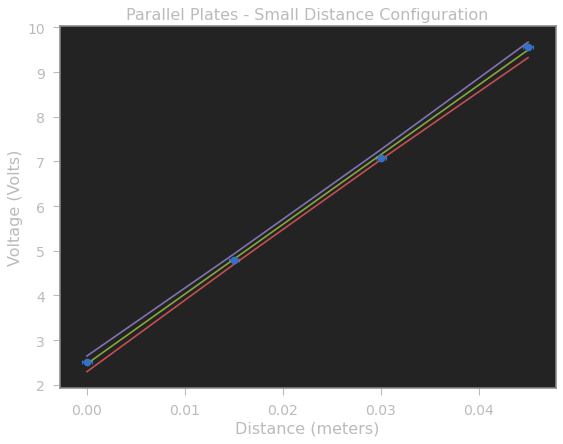

In [4]:
# Get the data from a linear fit of the voltage 
data =[[np.average([i[0] for i in v_field]),0.02,0.015*0,0.0005],
       [np.average([i[1] for i in v_field]),0.02,0.015*1,0.0005],
       [np.average([i[2] for i in v_field]),0.02,0.015*2,0.0005],
       [np.average([i[3] for i in v_field]),0.02,0.015*3,0.0005]]
df = pd.DataFrame(data, columns = ['V', 'dV','x','dx'])

print(df)

##############################

xi = df['x']
yi = df['V']
sigmaxi = df['dx']
sigmayi = df['dV']

##############################

from scipy.odr import *

def fitfunction(B, x):
    '''Linear function y = m*x + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*x + B[1]

linear = Model(fitfunction) # create a Model object based on the fitfuncion we have defined
mydata = RealData(xi, yi, sx=sigmaxi, sy=sigmayi) # create a data object based on our data, include errors.
myodr = ODR(mydata, linear, beta0=[1., 2.]) # create a fitting object, based on the data, fit Model, and an intial set of parameters.
myoutput = myodr.run()  # run the fitting process to get optimized parameters!

myoutput.pprint() # print out the result of the fit

# Now assign the important fit results to some more convenient variables.

popt = myoutput.beta # the vector of optimized parameters
pcov = myoutput.cov_beta # the covariance matrix
perr = myoutput.sd_beta # the vector of ERRORS in the optimized parameters

# The following lines generate upper and lower 99% "Confidence Bands" on the fit, for visualization
# purposes.

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(pi,xi) for pi in ps])

lower = np.percentile(ysample,0.5,axis=0)
upper = np.percentile(ysample,99.5,axis=0)
middle = (lower+upper)/2.0

print()
print ("Final Result: Y = (%0.9f +/- %0.9f) X + (%0.9f +/- %0.9f)" % (popt[0],perr[0],popt[1],perr[1]))

plt.figure(figsize=(8, 6), dpi=80)

plt.errorbar(xi, yi, xerr=sigmaxi, yerr=sigmayi, fmt='o', capsize=2, capthick=1)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)

#########################

plt.xlabel('Distance (meters)')
plt.ylabel('Voltage (Volts)')
plt.title('Parallel Plates - Small Distance Configuration')
plt.show()

fit_e = popt[0]
d_fit_e = perr[0]

159.14519686963447 7.515158655782469


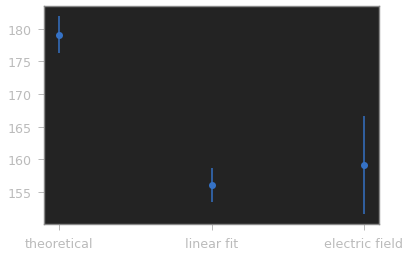

In [5]:
# Get data from electric field plot

# each datapoint is 1.5 cm from neighbors 
# [d] = 1.5 cm  = 1.5/100

avg_e = np.average(e_field) * 100/1.5 # = V/m 
d_avg_e = np.std(e_field) * 100/1.5

print(avg_e,d_avg_e)

# create plot to compare the three different methods

df2 = pd.DataFrame(['method', 'E', 'dE'])
df2['method'] = ['theoretical','linear fit','electric field']
df2['E'] = [theory_e,fit_e,avg_e]
df2['dE'] = [d_theory_e,d_fit_e,d_avg_e]

plt.errorbar(df2['method'], df2['E'] , yerr=df2['dE'], fmt="o")
plt.show()